<a href="https://colab.research.google.com/github/vatsal9117/Deep-Learning-Projects-/blob/main/DATA5100_01_23FQ_Zhang_Class02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the necessary libraries.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



# Context
This data set contains data regarding the allocation of funding from the Department of Developmental Services to developmentally-disabled individuals in California in 2014.

# Content
The variables included are:

Id [int]

Age Cohort (age group) [factor]

Age [int]

Gender [factor]

Expenditures [int]

Ethnicity [factor]


#Question
Is there any discrimination?

Is there any confounding factor?



Let's read data into python

In [ ]:

df = pd.read_csv("https://raw.githubusercontent.com/eliozhangwa/DATA5100-01-2023F/main/californiaDDSDataV2.csv")

In [ ]:
df.head()

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic
3,10538,18 to 21,19,Female,6400,Hispanic
4,10568,13 to 17,13,Male,4412,White not Hispanic


In [ ]:
df["Age Cohort"].value_counts()

22 to 50    226
13 to 17    212
18 to 21    199
6 to 12     175
51+         106
0 to 5       82
Name: Age Cohort, dtype: int64

In [ ]:
df["Ethnicity"].value_counts()

White not Hispanic    401
Hispanic              376
Asian                 129
Black                  59
Multi Race             26
American Indian         4
Native Hawaiian         3
Other                   2
Name: Ethnicity, dtype: int64

Next, let's consider two racial subgroups only, "White not Hispanic" and "Hispanic". Here we use a very useful python function lambda

In [ ]:
data0 = df[df["Ethnicity"].apply(lambda x: x in ["White not Hispanic","Hispanic"])]#,"Asian","Black"])]
data0["Ethnicity"].value_counts()

White not Hispanic    401
Hispanic              376
Name: Ethnicity, dtype: int64

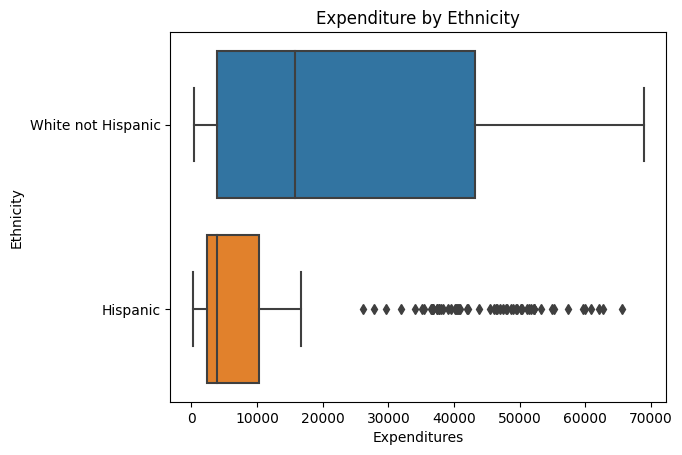

In [ ]:
sns.boxplot(data=data0, x='Expenditures', y='Ethnicity')
plt.title("Expenditure by Ethnicity")
plt.savefig("expenditure-by-ethnicity")

Is there any difference? Yes!

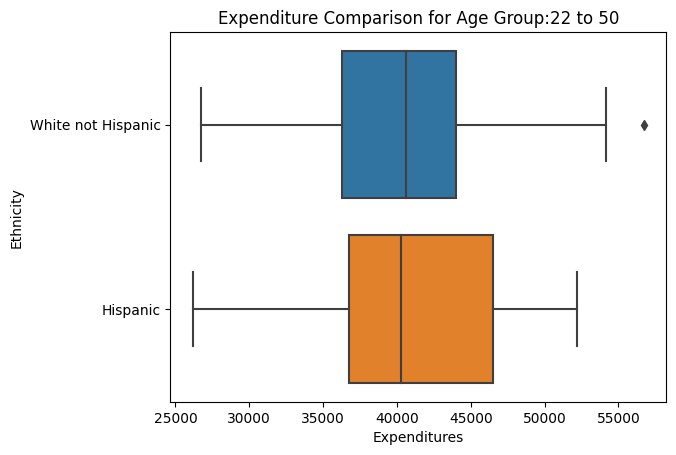

In [ ]:
sns.boxplot(data = data0[data0["Age Cohort"] == '22 to 50'] , x='Expenditures', y='Ethnicity')
plt.title( 'Expenditure Comparison for Age Group:'+ '22 to 50' )
plt.savefig("expenditure-by-ethnicity")

#Conclusion

For the age group, 22-50, the difference between the two ethnic groups is ignorable.

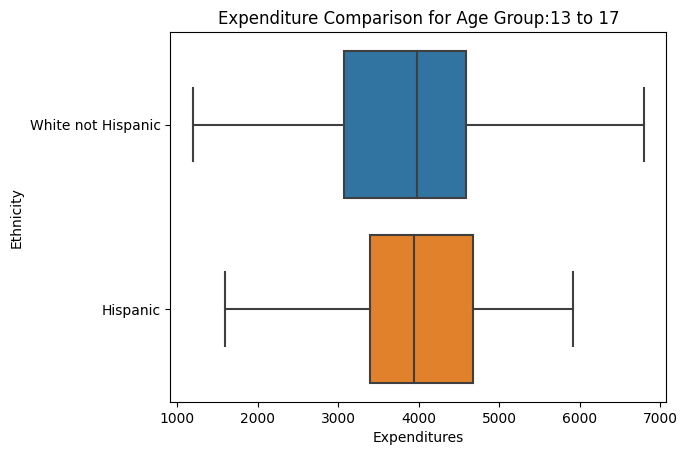

In [ ]:
sns.boxplot(data = data0[data0["Age Cohort"] == '13 to 17'] , x='Expenditures', y='Ethnicity')
plt.title( 'Expenditure Comparison for Age Group:'+ '13 to 17' )
plt.savefig("expenditure-by-ethnicity")

#plt.clf()

#Conclusion

For the age group, 13-17, the difference between the two ethnic groups is ignorable. We need a t-test here.

How to construct plots for all age groups using a loop?

In [ ]:
def Plot_box(data0, age):
    sns.boxplot(data = data0[data0["Age Cohort"] == age], x= 'Expenditures', y= 'Ethnicity')
    plt.title('Expenditure Comparison for Age Group:'+age)
    plt.show()
    return plt.savefig('Expenditure Comparison for Age Group:'+age)

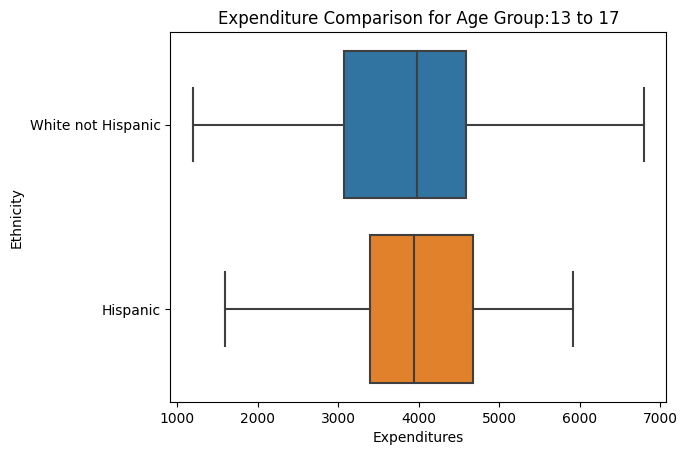

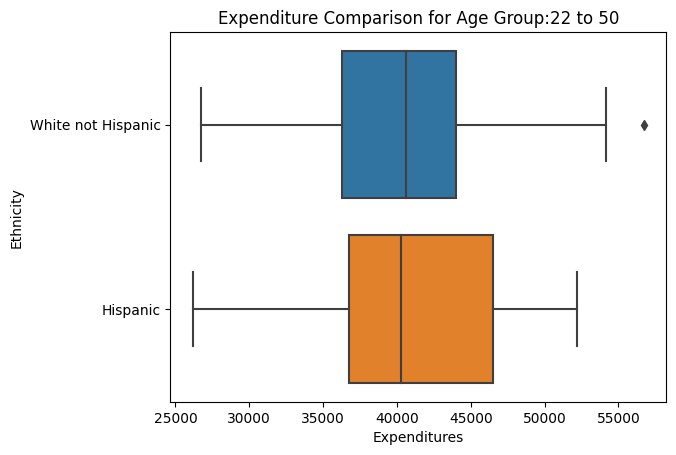

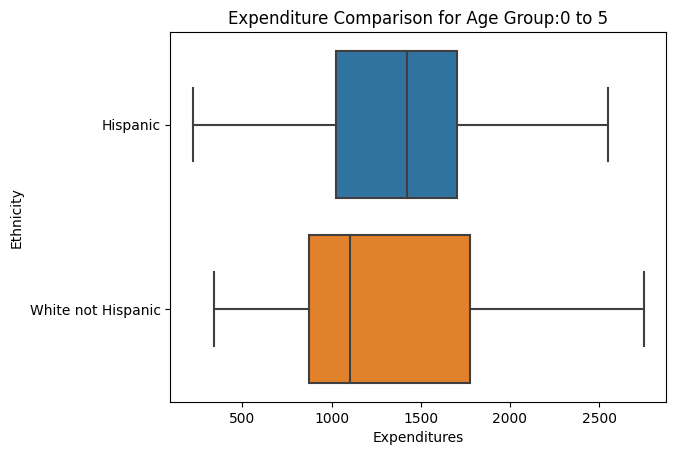

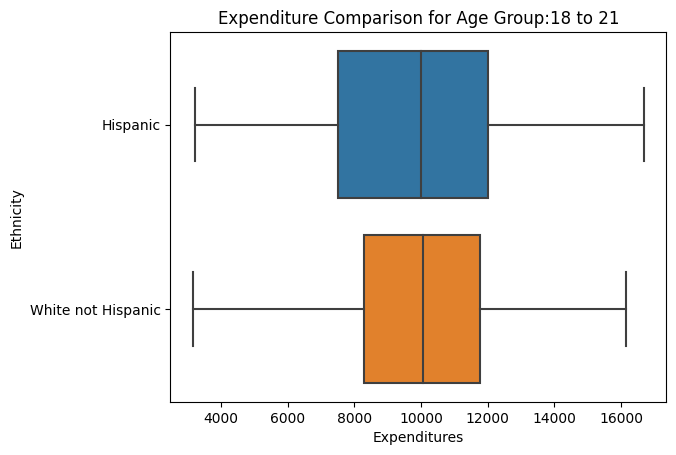

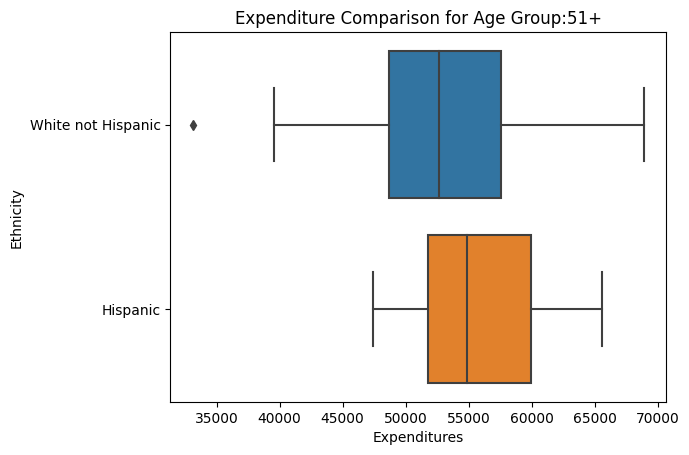

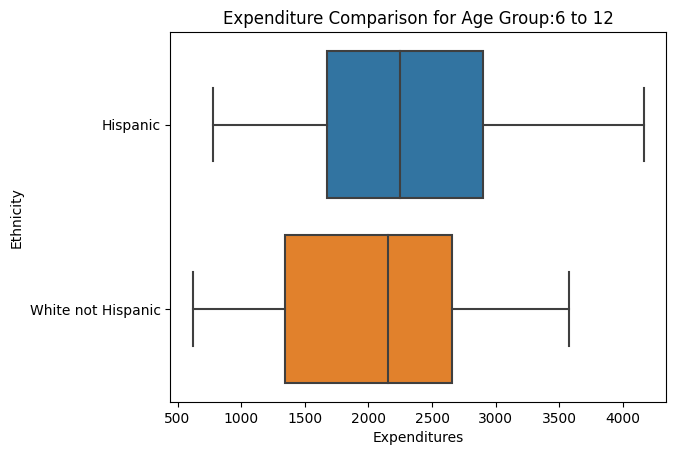

<Figure size 640x480 with 0 Axes>

In [ ]:
for age in data0["Age Cohort"].unique():
    Plot_box(data0,age)
    # plt.show()